## 이항 분류
### 표준화를 하지 않은 데이터의 이용: country1.csv 사용의 경우

In [2]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore') 

import os
import time

import numpy as np
import tensorflow as tf
import seaborn as sb

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화
from tensorflow.keras.callbacks import EarlyStopping # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 모델 저장

from sklearn.model_selection import train_test_split # 데이터 분할
from sklearn.metrics import confusion_matrix  # 혼돈행렬, 이항분류 시각화
from sklearn.metrics import roc_curve         # 분류 품질 시각화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

In [3]:
data = np.loadtxt('./country1.csv', delimiter=",", dtype=np.float64)
print(type(data))
print(data.shape)  
print(data)

<class 'numpy.ndarray'>
(100, 7)
[[0.e+00 0.e+00 0.e+00 5.e+00 1.e+00 0.e+00 0.e+00]
 [1.e+00 0.e+00 1.e+00 6.e+00 1.e+00 0.e+00 1.e+00]
 [1.e+00 1.e+00 1.e+00 1.e+01 1.e+00 0.e+00 1.e+00]
 [0.e+00 0.e+00 0.e+00 1.e+01 1.e+00 0.e+00 0.e+00]
 [1.e+00 0.e+00 1.e+00 1.e+01 1.e+00 2.e+03 1.e+00]
 [1.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+03 0.e+00]
 [0.e+00 0.e+00 0.e+00 5.e+00 1.e+00 0.e+00 0.e+00]
 [1.e+00 0.e+00 1.e+00 6.e+00 1.e+00 0.e+00 1.e+00]
 [1.e+00 1.e+00 1.e+00 1.e+01 1.e+00 3.e+03 1.e+00]
 [1.e+00 0.e+00 1.e+00 2.e+00 1.e+00 1.e+03 0.e+00]
 [0.e+00 1.e+00 1.e+00 1.e+01 1.e+00 3.e+03 1.e+00]
 [1.e+00 0.e+00 1.e+00 1.e+01 1.e+00 3.e+03 1.e+00]
 [0.e+00 0.e+00 0.e+00 5.e+00 1.e+00 0.e+00 0.e+00]
 [1.e+00 0.e+00 1.e+00 6.e+00 1.e+00 0.e+00 1.e+00]
 [1.e+00 1.e+00 1.e+00 1.e+01 1.e+00 1.e+03 1.e+00]
 [0.e+00 0.e+00 0.e+00 1.e+01 1.e+00 1.e+03 0.e+00]
 [1.e+00 0.e+00 1.e+00 1.e+01 1.e+00 3.e+03 1.e+00]
 [1.e+00 1.e+00 0.e+00 1.e+01 1.e+00 3.e+03 1.e+00]
 [0.e+00 0.e+00 0.e+00 5.e+00 1

In [4]:
# 훈련용 + 검증용: 90 건
x_train = data[0:90, 0:6] # 변수 6개, 0 ~ 5
print(x_train.shape)
y_train = data[0:90, 6]   # class 1개
print(y_train.shape)
# 테스트용: 10 건
x_test =data[90:, 0:6]    # 변수 6개, 0 ~ 5
print(x_test.shape)
y_test =data[90:, 6]      # class 1개
print(y_test.shape)

(90, 6)
(90,)
(10, 6)
(10,)


In [5]:
tf.random.set_seed(0)
model = Sequential()
model.add(Dense(20, input_dim=6, activation='relu')) # 기울기 소실 방지
model.add(Dense(15, activation='relu')) # 기울기 소실 방지
model.add(Dense(1, activation='sigmoid')) # True/False
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

# patience=2: 학습 결과가 개선되지 않아도 학습을 진행할 횟수
# restore_best_weights=True: 학습 종료시 가장 우수한 가중치, 편향으로 저장
es= EarlyStopping(monitor='loss', patience=1, restore_best_weights=True)

# 검증 정확도가 개선되었을 때만 학습 모델 파일로 저장
# filepath=modelpath: 파일이 저장되는 경로와 파일명
# monitor='val_accuracy': 검증 정확도 기준으로 판단
# verbose=1: 기록되는 파일 정보 출력
# save_best_only=True: 검증 정확도가 개선되면 파일로 저장
mcp= ModelCheckpoint(filepath='./Country1.h5',
                    monitor='val_accuracy',
                    verbose=1, save_best_only=True)

start = time.time()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=1000, batch_size=1, callbacks=[es, mcp])
end=time.time()
print('Runtime: {0:.0f} 초'.format(end-start))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
72/72 [==============================] - 1s 6ms/step - loss: 107.8087 - accuracy: 0.4837 - val_loss: 7.3090 - val_accuracy: 0.6667

Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to .\Country1.h5
Epoch 2/1000
72/72 [==============================] - 0s 1ms/step - loss: 9.3904 - accuracy: 0.5320 - val_loss: 4.3240 - val_accuracy: 0.3889

Epoch 00002: 

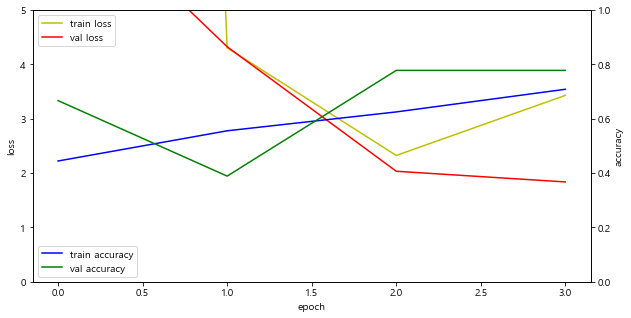

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 5.0]) # 값을 반영하여 변경

# 오른쪽 y 축 설정
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1]) # 0.0, 1: 0 ~ 100 %, 정확도임으로 변경하지 않음

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차
acc_ax.set_ylabel('accuracy') # 정확도

loss_ax.legend(loc='upper left') # 오차 레이블 위치
acc_ax.legend(loc='lower left')  # 정확도 레이블 위치

plt.show()

In [8]:
# verbose=0: 처리과정의 메시지 생략
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

10/10 [==============================] - 0s 776us/step - loss: 2.3311 - accuracy: 0.7000
손실값: 2.3311429023742676 /정확도: 69.9999988079071 %
